
$$f(x, λ,k)=  k/λ* (x/λ)^(k-1)*e^(-(x/λ)^k )$$

$$NLL(λ,k)=-∑log⁡(k/λ*(x/λ)^(k-1)*e^(-(x/λ)^k ) )$$

$$NLL(λ,k)=-∑log⁡k-log⁡λ+(k-1)(log⁡x-log⁡λ )-(x/λ)^k  log⁡e $$


In [1]:
import torch as th
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loss_function(dataset, k, lmda, eps=0.001):
    p1 = th.log(k+eps) - th.log(lmda+eps)
    p2 =(k-1)*(th.log(dataset+eps) - th.log(lmda+eps))
    p3 = -1*((dataset/lmda)**k)*th.log(th.tensor(np.e))
    ans = th.mean(p1+p2+p3)
    return -ans

In [3]:
def plot_loss_curve(loss_curve):
    plt.plot(list(range(len(loss_curve))), loss_curve)

In [4]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        k_prime = np.random.random()
        self.k_prime=nn.Parameter(th.tensor(k_prime))
        lmda_prime = np.random.random()
        self.lmda_prime=nn.Parameter(th.tensor(lmda_prime))
        
    def lmda(self):
        return th.abs(self.lmda_prime)
    
    def k(self):
        return th.abs(self.k_prime)
        
    def loss(self, dataset):
        return loss_function(dataset, self.lmda(), self.k())

In [5]:
dataset= np.load("data.npy")
dataset = th.tensor(dataset, dtype=th.float32)

In [6]:
model = Model()
lr = 0.01
optimiser = optim.SGD(model.parameters(), lr=lr)
num_iters = 2000
loss_curve = []

In [7]:
for i in range(num_iters):
    optimiser.zero_grad()
    loss_value = model.loss(dataset)
    loss_curve.append(loss_value.data.item())
    loss_value.backward()
    optimiser.step()

In [8]:
k = model.k().detach().numpy()
print(k)

1.2091713


In [9]:
lmda = model.lmda().detach().numpy()
print(lmda)

0.960932


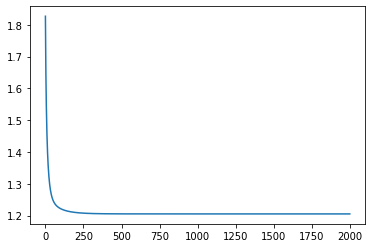

In [10]:
plot_loss_curve(loss_curve)